# STROKE DETECTION USING MACHINE LEARNING

# IMPORTING

Import necessary libraries :

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import missingno as msno
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import warnings

Import heart stroke dataset :

In [78]:
stroke_data=pd.read_csv(r'.\healthcare-dataset-stroke-data.csv')
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# EDA

GENDER :

In [79]:
count_gender=stroke_data['gender'].value_counts()
count_gender

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

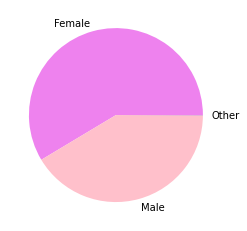

In [80]:
plt.pie(count_gender,labels=["Female","Male","Other"],colors=["violet","pink","blue"])
plt.show()

Insight : Total number of females in the data is higher than males.

Percentage of (male/female) getting stroke :

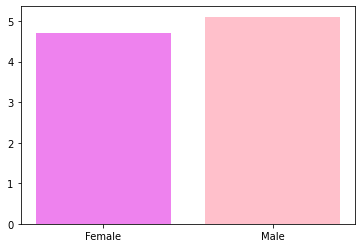

In [81]:
stroke_gender=((stroke_data[stroke_data['stroke'] == 1]['gender'].value_counts())/count_gender)*100
plt.bar(["Female","Male","Other"],stroke_gender,color=["violet","pink","blue"])
plt.show()

Insight : Males have higher chances of getting a stroke than females but the difference in percentage is LOW.

RESIDENCE TYPE :

In [82]:
count_residence=stroke_data['Residence_type'].value_counts()
count_residence

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

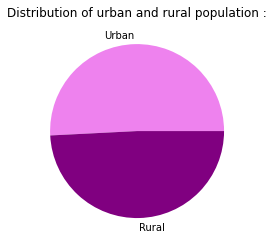

In [83]:
plt.pie(count_residence,labels =["Urban","Rural"],colors=["violet","purple"])
plt.title("Distribution of urban and rural population :")
plt.show()

Insight : Urban Population is slightly higher than rural population in the data.

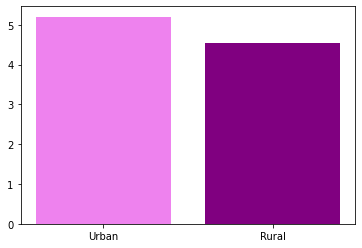

In [84]:
stroke_resitype=((stroke_data[stroke_data['stroke'] == 1]['Residence_type'].value_counts())/count_residence)*100
plt.bar(["Urban","Rural"],stroke_resitype,color=["violet","purple"])
plt.show()

Insight : Urban people are more likely to get a stroke than rural people (the difference is low).

WORK TYPE :

In [85]:
count_wtype=stroke_data['work_type'].value_counts()
count_wtype

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

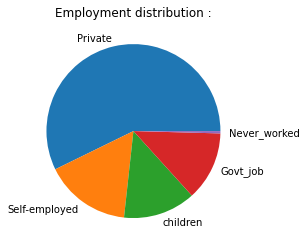

In [86]:
work=["Private","Self-employed","children","Govt_job","Never_worked"]
plt.pie(count_wtype,labels =work)
plt.title("Employment distribution :")
plt.show()

Insight : The data has more number of private employees.

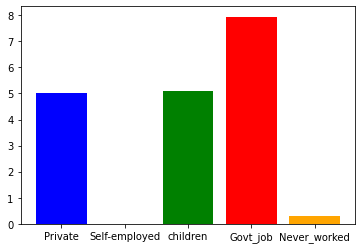

In [87]:
stroke_wtype=((stroke_data[stroke_data['stroke'] == 1]['work_type'].value_counts())/count_wtype)*100
plt.bar(work,stroke_wtype,color=["blue","green","green","red","orange"])
plt.show()

Insight : Goverment employees are more likely to get a stroke than the others.

SMOKING :

In [88]:
count_smoke=stroke_data['smoking_status'].value_counts()
count_smoke

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

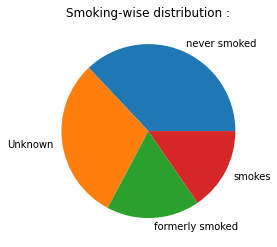

In [89]:
smoke=["never smoked","Unknown","formerly smoked","smokes"]
plt.pie(count_smoke,labels =smoke)
plt.title("Smoking-wise distribution :")
plt.show()

Insight : The dataset has more people who had never smoked.

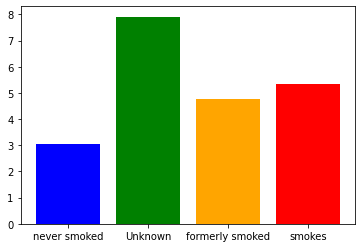

In [90]:
stroke_smoke=((stroke_data[stroke_data['stroke'] == 1]['smoking_status'].value_counts())/count_smoke)*100
plt.bar(smoke,stroke_smoke,color=["blue","green","orange","red"])
plt.show()

Insight : As the unknown smoking status is very high we can't decide regarding smoking status.

# DATA PREPROCESSING 

Checking for presence of duplicate data :

In [91]:
print("No/of duplicate data =",stroke_data.duplicated().sum())

No/of duplicate data = 0


Datatype of each column :

In [92]:
stroke_data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Specify independent and dependent variables :

In [93]:
X=stroke_data.drop(['id','stroke'],axis=1)
y=stroke_data["stroke"]

Checking whether the data is balanced :

In [94]:
y_count=y.value_counts()
print(y_count)

0    4861
1     249
Name: stroke, dtype: int64


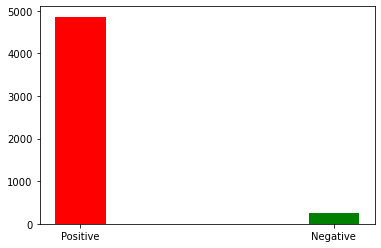

In [95]:
stroke=["Positive","Negative"]
no_of_data=[y_count[0],y_count[1]]
plt.bar(stroke,no_of_data,width=0.2,color=["red","green"],align="center")
plt.show()
#The data is unbalanced with very less instances for negative stroke cases

Detecting Missing values in independent variables : 

In [96]:
X.isna().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
dtype: bool

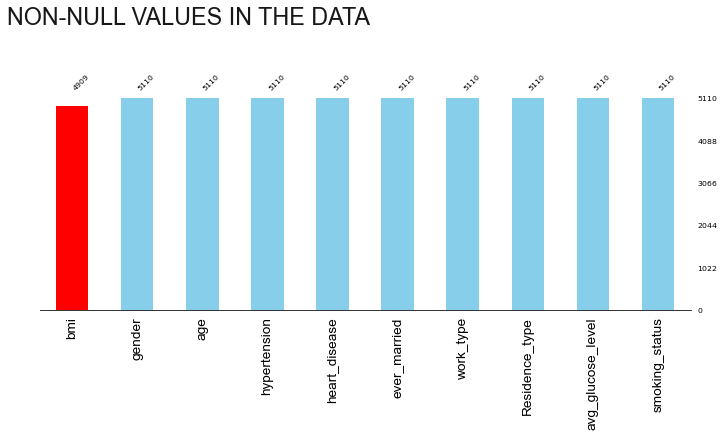

In [97]:
color = ['red','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue']
fig, ax = plt.subplots(figsize = (12,4), dpi = 70)
msno.bar(X, sort = 'ascending', color = color, ax = ax, fontsize =8,labels = 'off',filter = 'top')
ax.text(-1,1.35,'NON-NULL VALUES IN THE DATA',{'font': 'arial', 'size': 24,  'color':'black'},alpha = 0.9)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, ha = 'center', **{'font': 'arial', 'size': 14,'weight':'normal','color':'black'}, alpha = 1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)

In [98]:
missing=X['bmi'].isna().sum()
total=len(X['bmi'])
print("Percentage of data missing : ",(missing/total)*100)

Percentage of data missing :  3.9334637964774952


Replacing missing values with mean (since data is numerical) :

In [99]:
X['bmi']=X['bmi'].fillna(X['bmi'].mean())

In [100]:
print("Any missing values in 'bmi' column =",X['bmi'].isna().any())

Any missing values in 'bmi' column = False


Changing column type to categorical :

In [101]:
X['gender'] = X['gender'].astype('category')
X['ever_married']=X['ever_married'].astype('category')
X['work_type']=X['work_type'].astype('category')
X['Residence_type']=X['Residence_type'].astype('category')
X['smoking_status']=X['smoking_status'].astype('category')

In [102]:
categories={}
categories['gender']=list(X['gender'].cat.categories)
categories['ever_married']=list(X['ever_married'].cat.categories)
categories['work_type']=list(X['work_type'].cat.categories)
categories['Residence_type']=list(X['Residence_type'].cat.categories)
categories['smoking_status']=list(X['smoking_status'].cat.categories)

Encoding categorical data :

In [103]:
X['gender'] = X['gender'].cat.codes
X['ever_married']=X['ever_married'].cat.codes
X['work_type']=X['work_type'].cat.codes
X['Residence_type']=X['Residence_type'].cat.codes
X['smoking_status']=X['smoking_status'].cat.codes

In [104]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


Splitting the Dataset into the Training set and Test set :

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.30, random_state=0)

Feature scaling :

In [106]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test=pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

Handling imbalanced data :

Oversampling :

In [107]:
sm = SMOTE(random_state=2)
train_x, train_y = sm.fit_resample(X_train, y_train.ravel())
print("After Oversampling using SMOTE,\n\nNumber of positive instances =",sum(train_y==1))
print("Number of negative instances =",sum(train_y==0))

After Oversampling using SMOTE,

Number of positive instances = 3404
Number of negative instances = 3404


# INITIALIZING VARIOUS BINARY CLASSIFIERS

# Logistic Regression :

In [108]:
models = {}
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# K-Nearest Neighbors :

In [109]:
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

# Naive Bayes :

In [110]:
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# Random Forest :

In [111]:
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Decision Trees :

In [112]:
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Support Vector Machines :

In [113]:
from sklearn.svm import SVC
models['Support Vector Machines'] = SVC()

# PERFORMANCE EVALUATION

In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy, precision, recall = {}, {}, {}
predictions={}
for key in models.keys():
    models[key].fit(train_x, train_y)
    predictions[key] = models[key].predict(X_test)
    accuracy[key] = accuracy_score(predictions[key], y_test)
    precision[key] = precision_score(predictions[key], y_test)
    recall[key] = recall_score(predictions[key], y_test)

In [115]:
evaluation = pd.DataFrame(index=models.keys())
evaluation['Accuracy'] = accuracy.values()
evaluation['Precision'] = precision.values()
evaluation['Recall'] = recall.values()
evaluation

,Accuracy,Precision,Recall
Logistic Regression,0.757991,0.723684,0.135802
K-Nearest Neighbor,0.815395,0.328947,0.097276
Naive Bayes,0.748858,0.684211,0.125908
Random Forest,0.925636,0.105263,0.148148
Decision Trees,0.885845,0.223684,0.127820
Support Vector Machines,0.774299,0.578947,0.122905


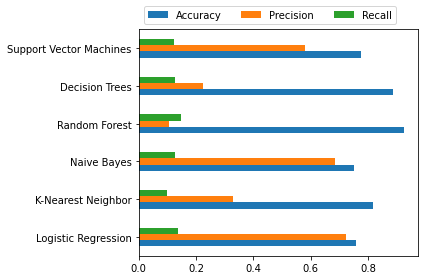

In [116]:
ax = evaluation.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 10}
)
plt.tight_layout()

# MODEL TUNING

In [117]:
from sklearn.model_selection import GridSearchCV
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}]), 
               (GaussianNB(),[{'var_smoothing': [1e-09]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}])]

In [118]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy')
    grid.fit(train_x, train_y)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('')

LogisticRegression():
Best Accuracy : 78.76%
Best Parameters :  {'C': 0.75, 'random_state': 0}


KNeighborsClassifier():
Best Accuracy : 92.30%
Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 5}


SVC():
Best Accuracy : 86.22%
Best Parameters :  {'C': 1, 'kernel': 'rbf', 'random_state': 0}


GaussianNB():
Best Accuracy : 79.07%
Best Parameters :  {'var_smoothing': 1e-09}


DecisionTreeClassifier():
Best Accuracy : 92.19%
Best Parameters :  {'criterion': 'entropy', 'random_state': 0}


RandomForestClassifier():
Best Accuracy : 96.31%
Best Parameters :  {'criterion': 'entropy', 'n_estimators': 150, 'random_state': 0}




# HYPERPARAMETER TUNING :

# Fitting the best model :

In [119]:
model = RandomForestClassifier(criterion='entropy',n_estimators=150,random_state=0)
model.fit(train_x, train_y)
predicted=model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1457
           1       0.18      0.13      0.15        76

    accuracy                           0.93      1533
   macro avg       0.57      0.55      0.56      1533
weighted avg       0.92      0.93      0.92      1533



In [120]:
print("Accuracy of random forest classifier after hyperparameter tuning = ",round(accuracy_score(predicted, y_test)*100,0),"%")

Accuracy of random forest classifier after hyperparameter tuning =  93.0 %


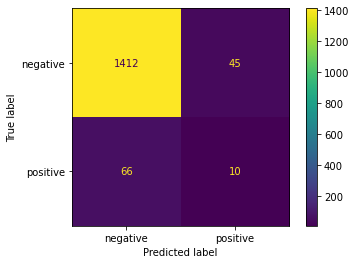

In [121]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["negative","positive"])
cm_display.plot()
plt.show()

In [122]:
print("Percentage of true negative = ",int(round((1412/(66+1412))*100,0)),"%")

Percentage of true negative =  96 %


In [123]:
attributes=['gender','age','hypertension ["No","Yes"]','heart_disease ["No","Yes"]','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']
pred=[[0 for i in range(10)] for j in range(1)]
i=0
for att in attributes:
    if(att in ['gender','ever_married','work_type','Residence_type','smoking_status']):
        print(att,":",categories[att])
    else :
        print(att,":")
    pred[0][i]=float(input())
    i+=1
if models['Random Forest'].predict(pred)==1:    
    print("You had stroke. Please consult a neurologist!")
else:
    print("You does'nt have stroke.")
warnings.filterwarnings("ignore")

gender : ['Female', 'Male', 'Other']
1
age :
27
hypertension ["No","Yes"] :
0
heart_disease ["No","Yes"] :
0
ever_married : ['No', 'Yes']
1
work_type : ['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children']
3
Residence_type : ['Rural', 'Urban']
1
avg_glucose_level :
82.9
bmi :
25
smoking_status : ['Unknown', 'formerly smoked', 'never smoked', 'smokes']
0
You does'nt have stroke.


C:\Users\keert\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
